Proyecto 1: Predicción de Precios de Casas

In [9]:
# importando librerías
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Cargar Dataset de precios de casas en California
data = fetch_california_housing()

# Convertir en un dataframe de pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target * 100000  # Convertir en dolares

# Imprimir los primeros 5 valores
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude     Price  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122.25  341300.0  
4    -122.25  342200.0  


In [7]:
# Tamaño del dataet (filas,columnas)
print("Dimensiones del Dataset: ", df.shape)

# Verificar valores faltantes
print("Valores faltantes: ", df.isnull().sum())

Dimensiones del Dataset:  (20640, 9)
Valores faltantes:  MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [8]:
# muestra estadísticas de los datos
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          Price  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704  206855.816909  
std       10.386050      2.135952      2.003532  115395.615874  
min        0.692308     32.5

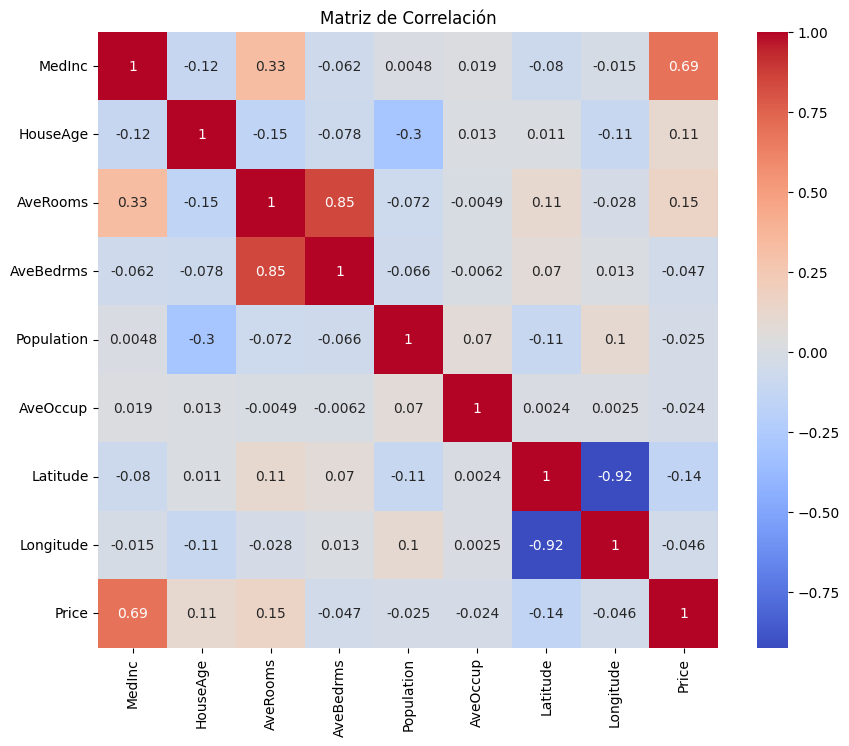

In [10]:
# Visualizamos los datos
# Mapa de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

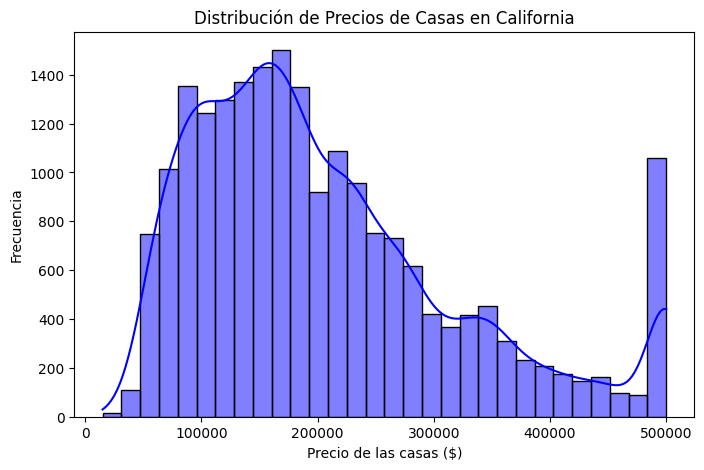

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.xlabel("Precio de las casas ($)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Casas en California")
plt.show()


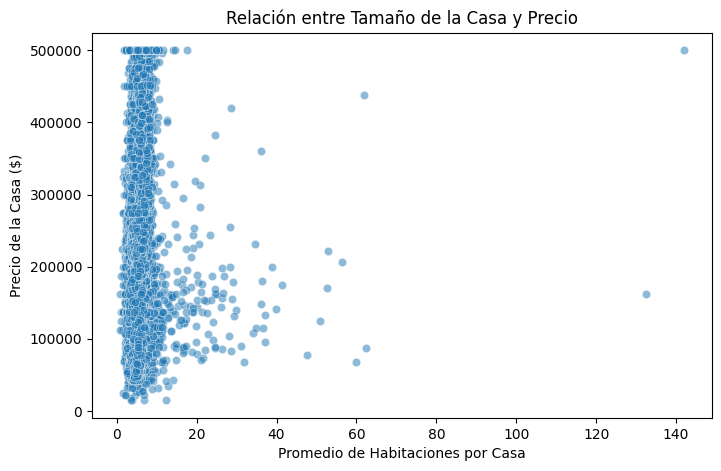

In [12]:
# Relación Tamaño Precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["AveRooms"], y=df["Price"], alpha=0.5)
plt.xlabel("Promedio de Habitaciones por Casa")
plt.ylabel("Precio de la Casa ($)")
plt.title("Relación entre Tamaño de la Casa y Precio")
plt.show()


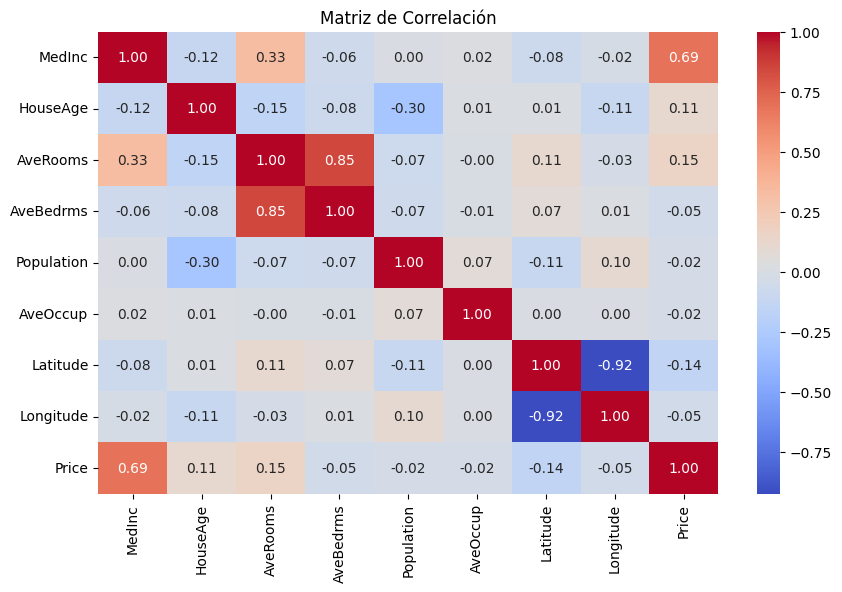

In [13]:
# Mapa de Calor 2
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [15]:
# Prepara los datos
X = df.drop('Price', axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar tamaños de cada conjunto
print("Datos de entrenamiento:", X_train.shape, y_train.shape)
print("Datos de prueba:", X_test.shape, y_test.shape)


Datos de entrenamiento: (16512, 8) (16512,)
Datos de prueba: (4128, 8) (4128,)


In [16]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba (sin volver a ajustar)
X_test_scaled = scaler.transform(X_test)



In [17]:
# Entrenar el Modelo con LinearRegression

from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar con los datos de entrenamiento
modelo.fit(X_train_scaled, y_train)

# Mostrar los coeficientes y el sesgo
print("Pesos (coeficientes):", modelo.coef_)
print("Sesgo (bias):", modelo.intercept_)


Pesos (coeficientes): [ 85438.30309269  12254.62380784 -29441.01344733  33925.94905945
   -230.77231458  -4082.91030851 -89692.88766387 -86984.17752417]
Sesgo (bias): 207194.69373788778


In [18]:
# Hacer Predicciones
# Predecir con los datos de prueba
y_pred = modelo.predict(X_test_scaled)

# Mostrar las primeras 5 predicciones
print("Predicciones:", y_pred[:5])
print("Valores reales:", y_test[:5].values)


Predicciones: [ 71912.28416019 176401.65706624 270965.88334317 283892.59301839
 260465.72518103]
Valores reales: [ 47700.  45800. 500001. 218600. 278000.]


In [19]:
# Evaluar el Modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 53320.01
MSE: 5558915986.95
R²: 0.58


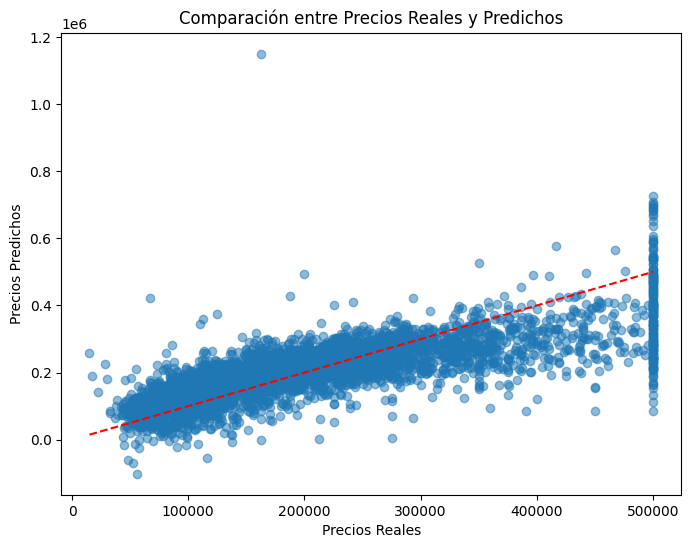

In [20]:
# Mejorar el Modelo

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle="--")
plt.xlabel("Precios Reales")
plt.ylabel("Precios Predichos")
plt.title("Comparación entre Precios Reales y Predichos")
plt.show()


In [21]:
# Usando algo más complejo

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear modelo polinómico de grado 2
modelo_polinomico = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Entrenar
modelo_polinomico.fit(X_train_scaled, y_train)

# Predecir
y_pred_poly = modelo_polinomico.predict(X_test_scaled)

# Evaluar
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² con Regresión Polinómica: {r2_poly:.2f}")


R² con Regresión Polinómica: 0.65


In [22]:
# Regresión Polinomica
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear modelo polinómico de grado 2
modelo_polinomico = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Entrenar
modelo_polinomico.fit(X_train_scaled, y_train)

# Predecir
y_pred_poly = modelo_polinomico.predict(X_test_scaled)

# Evaluar
r2_poly = r2_score(y_test, y_pred_poly)
print(f"R² con Regresión Polinómica: {r2_poly:.2f}")


R² con Regresión Polinómica: 0.65


In [28]:
# Agregar más variables
#X = df[["Rooms", "Area", "Location_Score", "Year_Built"]]  # Nuevas variables
# aqui hubo un error al elegir las variables

print(df.columns)

X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]

# Verificando si funcion
print(X.head())  # Muestra las primeras 5 filas de las variables seleccionadas
print(X.isnull().sum())  # Verifica si hay valores nulos
print(X.dtypes)  # Revisa los tipos de datos


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     

In [29]:
# continuando con el entrenamiento
from sklearn.model_selection import train_test_split

y = df["Price"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Guardar el modelo

In [31]:
# Guardar el modelo
import joblib

# Guardar el modelo entrenado
joblib.dump(modelo, "modelo_precio_casas.pkl")

print("Modelo guardado correctamente")


Modelo guardado correctamente


In [32]:
# Cargar el Modelo Guardado
# Cargar el modelo guardado
modelo_cargado = joblib.load("modelo_precio_casas.pkl")

print("Modelo cargado correctamente")


Modelo cargado correctamente


In [33]:
# Probando una predicción
# Crear una nueva casa con valores aleatorios
nueva_casa = [[3.5, 20, 5.8, 1.1, 1200, 2.5, 37.5, -122.4]]  # Cambia estos valores según las columnas de X

# Hacer la predicción
prediccion = modelo_cargado.predict(nueva_casa)

print(f"El precio estimado de la casa es: ${prediccion[0]:,.2f}")


El precio estimado de la casa es: $7,614,127.88


In [34]:
columnas = X.columns  # Obtener nombres de las columnas
valores = nueva_casa[0]  # Extraer los valores de la lista

# Imprimir columnas con sus valores
for col, val in zip(columnas, valores):
    print(f"{col}: {val}")


MedInc: 3.5
HouseAge: 20
AveRooms: 5.8
AveBedrms: 1.1
Population: 1200
AveOccup: 2.5
Latitude: 37.5
Longitude: -122.4
